In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

Load the data on properties of cars into a pd dataframe

In [2]:
df= pd.read_csv("accord_sedan.csv")
df.head()

,price,mileage,year,trim,engine,transmission
0,14995,67697,2006,ex,4 Cyl,Manual
1,11988,73738,2006,ex,4 Cyl,Manual
2,11999,80313,2006,lx,4 Cyl,Automatic
3,12995,86096,2006,lx,4 Cyl,Automatic
4,11333,79607,2006,lx,4 Cyl,Automatic


Plot suitable graphs to show the distributions and help indicate outliers of price and mileage (e.g. with boxplots) and their joint distribution (e.g. with a scatterplot)¶

Text(0, 0.5, 'Outliers')

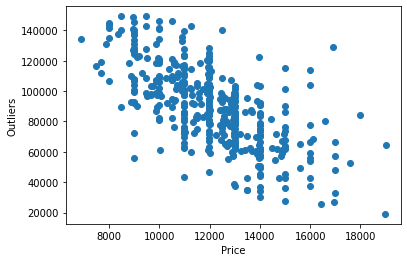

In [3]:
plt.scatter(x=df["price"],y= df["mileage"])
plt.xlabel("Price")
plt.ylabel("Outliers")

/Users/andreacortes/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

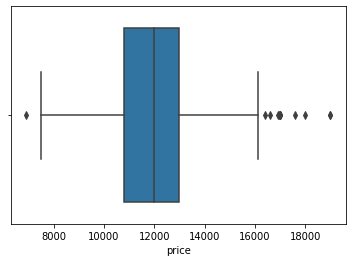

In [4]:
sns.boxplot(df['price'])

/Users/andreacortes/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mileage'>

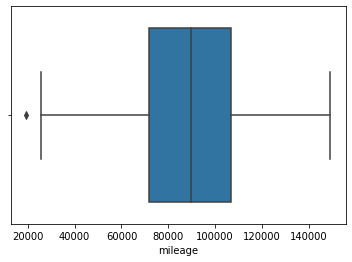

In [5]:
sns.boxplot(df['mileage'])

(Visually) identify the outliers.
'''Add two new columns to the dataframe called isOutlierPrice, isOutlierMileage. For the price column, calculate the mean and standard deviation. Use the standard deviation and mean to try to identify outliers for these two variables and mark them with a 1 in the isOutlierPrice and isOutlierMilage columns. For example, you could look for values that are more than 2 standard deviations away from the mean. You can either use a loop and the Pandas loc() function to access and update values, or you can use the more efficient Pandas methods that are summarised in the Cheat Sheet that you used a bit of last week.'''

In [6]:
import numpy as np

In [7]:
mean_price = np.mean(df['price'])
std_price = np.std(df['price'])
mean_mileage = np.mean(df['mileage'])
std_mileage = np.std(df['mileage'])

In [8]:
threshold = 2
price_o = []
mileage_o=[]
for i in df['price']:
    z = (i-mean_price)/std_price
    if z > threshold:
        price_o.append(1)
    else:
        price_o.append('')
for i in df['mileage']:
    z = (i-mean_mileage)/std_mileage
    if z > threshold:
        mileage_o.append(1)
    else:
        mileage_o.append('')
df['isOutlierPrice']= price_o
df['isOutlierMilage']= mileage_o

In [9]:
df.head()

,price,mileage,year,trim,engine,transmission,isOutlierPrice,isOutlierMilage
0,14995,67697,2006,ex,4 Cyl,Manual,,
1,11988,73738,2006,ex,4 Cyl,Manual,,
2,11999,80313,2006,lx,4 Cyl,Automatic,,
3,12995,86096,2006,lx,4 Cyl,Automatic,,
4,11333,79607,2006,lx,4 Cyl,Automatic,,


Show these "outliers" using a different colour (hue) in the plot. Are these what you¶
would consider outliers? Observe whether they are the same as you would mark them.

<AxesSubplot:xlabel='price', ylabel='mileage'>

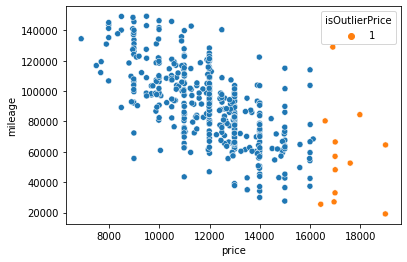

In [10]:
sns.scatterplot(data=df, x="price", y="mileage", hue="isOutlierPrice")

<AxesSubplot:xlabel='price', ylabel='mileage'>

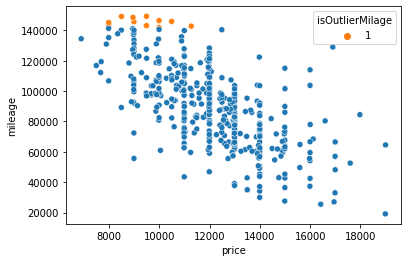

In [11]:
sns.scatterplot(data=df, x="price", y="mileage", hue="isOutlierMilage")


Optional: Use Mahalanobis distance to identify 2D outliers. You can compute a 2D¶
Mahalanobis distance for each row using a scipy's cdist() function). For this, you need to find the 2D mean vector and find the 2D Mahalanobis distance of each point to this mean vector. Finally, colour all the points according to their Mahalanobis Distance. Here is a matplotlib example that uses colouring and choose an appropriate colour map here (use a sequential lightness-based colour scheme). Compare your outlier observation step-3 to the resulting scatterplot.

In [12]:
from scipy.spatial.distance import cdist


In [13]:
Y = cdist(df[['price','mileage']], [[mean_price, mean_mileage]], 'mahalanobis', VI=None)

Optional: Use Mahalanobis distance to identify 2D outliers. You can compute a 2D
Mahalanobis distance for each row using a scipy's cdist() function). For this, you need to find the 2D mean vector and find the 2D Mahalanobis distance of each point to this mean vector. Finally, colour all the points according to their Mahalanobis Distance. Here is a matplotlib example that uses colouring and choose an appropriate colour map here (use a sequential lightness-based colour scheme). Compare your outlier observation step-3 to the resulting scatterplot.

In [14]:
from scipy.spatial.distance import cdist

In [15]:
Y = cdist(df[['price','mileage']], [[mean_price, mean_mileage]], 'mahalanobis', VI=None)

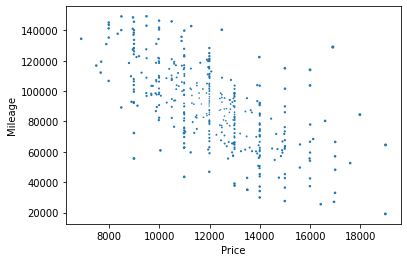

In [16]:
ax = plt.subplot(111)
c= ax.scatter(df['price'], df['mileage'], s=Y, cmap='Reds', alpha=1)
plt.xlabel("Price")
plt.ylabel("Mileage")
plt.show()

In [17]:
import statsmodels.api as sm

Exercise 2

In [18]:
df= pd.read_csv("TB_burden_countries_2021-10-12.csv")
df.head()

,country,iso2,iso3,iso_numeric,g_whoregion,year,e_pop_num,e_inc_100k,e_inc_100k_lo,e_inc_100k_hi,...,cfr,cfr_lo,cfr_hi,cfr_pct,cfr_pct_lo,cfr_pct_hi,c_newinc_100k,c_cdr,c_cdr_lo,c_cdr_hi
0,Afghanistan,AF,AFG,4,EMR,2000,20779957,190.0,123.0,271.0,...,NaN,NaN,NaN,NaN,NaN,NaN,34.0,18.0,13.0,28.0
1,Afghanistan,AF,AFG,4,EMR,2001,21606992,189.0,123.0,271.0,...,NaN,NaN,NaN,NaN,NaN,NaN,47.0,25.0,17.0,38.0
2,Afghanistan,AF,AFG,4,EMR,2002,22600774,189.0,122.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,61.0,32.0,23.0,50.0
3,Afghanistan,AF,AFG,4,EMR,2003,23680871,189.0,122.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,58.0,31.0,22.0,48.0
4,Afghanistan,AF,AFG,4,EMR,2004,24726689,189.0,122.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,74.0,39.0,28.0,61.0


In [19]:
df['e_inc_100k'].isna().sum()

0

In [20]:
mu= np.mean(df['e_inc_100k'])
sigma = np.std(df['e_inc_100k'])

AttributeError: 'Rectangle' object has no property 'normed'

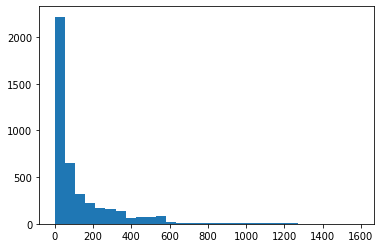

In [21]:
count, bins, ignored = plt.hist(df['e_inc_100k'], 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()

AttributeError: 'Rectangle' object has no property 'normed'

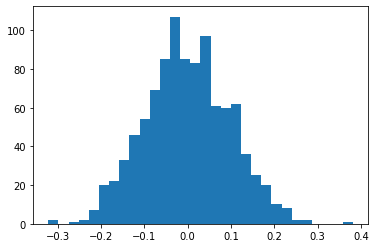

In [22]:
mu, sigma = 0, 0.1
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()

Pick one of the columns from the Tuberculosis data and compare to a normal distribution. See this link for various distributions and functions to use in data sampling and in particular consider sampling from the normal distribution in this case as explained in this example. Use the statsmodels qqplot() function to generate a qqplot. Compare this to a histogram representation.

/Users/andreacortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


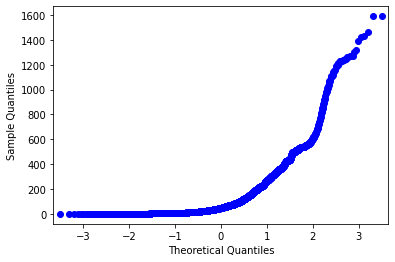

In [23]:
fig = sm.qqplot(df['e_inc_100k'])
plt.show()

Randomly sample data from a known distribution (you can choose to sample from a normal distribution as we did on Step-2 above) with varying sample sizes of n = 5, 10, 100 and varying s = standard deviations (try 3 different values, you can have a look at this Wikipedia figure to get inspiration on the standard deviation measures) and make observations on how well the "underlying distribution" is preserved in the sampled data you are drawing from.

In [25]:
import statsmodels

In [26]:
mu, sigma = 0, 0.1
mu1, sigma1 = 0, 0.5
mu2, sigma2 = 0, 1
s1 = np.random.normal(mu, sigma, 5)
s2 = np.random.normal(mu, sigma, 10)
s3 = np.random.normal(mu, sigma, 100)

s4 = np.random.normal(mu1, sigma1, 5)
s5 = np.random.normal(mu1, sigma1, 10)
s6 = np.random.normal(mu1, sigma1, 100)

s7 = np.random.normal(mu2, sigma2, 5)
s8 = np.random.normal(mu2, sigma2, 10)
s9 = np.random.normal(mu2, sigma2, 100)

In [27]:
print("Mean s1: ", np.mean(s1))
print("sigma s1: ", np.std(s1))

Mean s1:  0.0015104669001366755
sigma s1:  0.08333688827858042


In [28]:
print("Mean s2: ", np.mean(s2))
print("sigma s2: ", np.std(s2))

Mean s2:  0.008451016967818987
sigma s2:  0.11821706834900808


In [29]:
print("Mean s3: ", np.mean(s3))
print("sigma s3: ", np.std(s3))

Mean s3:  -0.009490455765296727
sigma s3:  0.10456040411361127


In [30]:
print("Mean s4: ", np.mean(s4))
print("sigma s4: ", np.std(s4))

Mean s4:  0.17272215390992285
sigma s4:  0.4918159174502339


In [31]:
print("Mean s5: ", np.mean(s5))
print("sigma s5: ", np.std(s5))

Mean s5:  -0.12369827730175449
sigma s5:  0.4777403707348913


In [32]:
print("Mean s6: ", np.mean(s6))
print("sigma s6: ", np.std(s6))

Mean s6:  -0.04674928145455563
sigma s6:  0.48566987317418053


In [33]:
print("Mean s7: ", np.mean(s7))
print("sigma s7: ", np.std(s7))

Mean s7:  0.06418712487170768
sigma s7:  0.41684843142585115


In [34]:
print("Mean s8: ", np.mean(s8))
print("sigma s8: ", np.std(s8))

Mean s8:  -0.016394795413261505
sigma s8:  1.4198005450839897


In [35]:
print("Mean s9: ", np.mean(s9))
print("sigma s9: ", np.std(s9))

Mean s9:  -0.021965357782892336
sigma s9:  1.030592056537393


In [36]:
statsmodels.stats.stattools.robust_kurtosis(s1)

(-1.4515422145161583,
 -0.4876575051127032,
 -1.388157748758114,
 -1.4640592529996388)

In [37]:
statsmodels.stats.stattools.robust_kurtosis(s2)

(-0.9789489994797291,
 0.1856455421424672,
 -0.7114756038679937,
 -0.48589774875596925)

In [38]:
statsmodels.stats.stattools.robust_kurtosis(s3)

(0.5480568010500462,
 -0.018565741767132105,
 0.2891191174036538,
 0.7112665701095167)

In [39]:
statsmodels.stats.stattools.robust_kurtosis(s4)

(-1.316896761902752,
 -0.25252404455996813,
 -1.2606421837466528,
 -1.0408190240047157)

In [40]:
statsmodels.stats.stattools.robust_kurtosis(s5)

(-1.0823985658795794,
 -0.05600912984523676,
 -0.6774458402939527,
 -0.5877828917224175)

In [41]:
statsmodels.stats.stattools.robust_kurtosis(s6)



(-0.18424038556710487,
 0.12881577881048645,
 -0.03463699222053673,
 0.2566213752257518)

In [42]:
statsmodels.stats.stattools.robust_kurtosis(s7)

(-0.8517544076667956,
 0.11625169565256388,
 -1.1259585822041474,
 -0.37702269162215796)

In [43]:
statsmodels.stats.stattools.robust_kurtosis(s8)

(-0.46103035737870224,
 -0.4566886522987572,
 -0.5575638455180205,
 -0.5812211401383571)

In [44]:
statsmodels.stats.stattools.robust_kurtosis(s9)

(-0.41355239968268087,
 -0.08101936051794811,
 -0.10679592933835069,
 -0.10562476210369853)

In [45]:
statsmodels.stats.stattools.robust_skewness(s1, axis=0)

(-0.5549747691510295,
 -0.7092957283196606,
 -0.7456230477267444,
 -0.6136656631088832)

In [46]:
statsmodels.stats.stattools.robust_skewness(s2, axis=0)

(0.3492945164797372,
 -0.42502530520110654,
 -0.034706401049514606,
 -0.02880343707151663)

In [47]:
statsmodels.stats.stattools.robust_skewness(s3, axis=0)

(0.2624891225138148,
 0.4272099021944634,
 0.1997122956681515,
 0.15510038197725753)

In [48]:
statsmodels.stats.stattools.robust_skewness(s4, axis=0)

(0.05952112502373585,
 -0.26161589826471493,
 -0.10782620223310499,
 -0.09143955232828961)

In [49]:
statsmodels.stats.stattools.robust_skewness(s5, axis=0)

(0.09404641517002618,
 -0.6113108067945194,
 -0.294164001935521,
 -0.24482945093918002)

In [50]:
statsmodels.stats.stattools.robust_skewness(s6, axis=0)

(0.1759972566497021,
 -0.10423776311244212,
 -0.00040842248848028365,
 -0.00032395253364168105)

In [51]:
statsmodels.stats.stattools.robust_skewness(s7, axis=0)

(0.7576849052722056,
 0.8487173557204937,
 0.6726532697335461,
 0.5183660809768118)

In [52]:
statsmodels.stats.stattools.robust_skewness(s8, axis=0)

(-0.5253155630782593,
 0.33209893142831237,
 0.09375248721498348,
 0.0789758820036525)

In [53]:
statsmodels.stats.stattools.robust_skewness(s9, axis=0)

(0.011047765541517358,
 0.1196073896272137,
 0.06873878952376443,
 0.05522419667516475)

In [54]:
df.columns

Index(['country', 'iso2', 'iso3', 'iso_numeric', 'g_whoregion', 'year',
       'e_pop_num', 'e_inc_100k', 'e_inc_100k_lo', 'e_inc_100k_hi',
       'e_inc_num', 'e_inc_num_lo', 'e_inc_num_hi', 'e_tbhiv_prct',
       'e_tbhiv_prct_lo', 'e_tbhiv_prct_hi', 'e_inc_tbhiv_100k',
       'e_inc_tbhiv_100k_lo', 'e_inc_tbhiv_100k_hi', 'e_inc_tbhiv_num',
       'e_inc_tbhiv_num_lo', 'e_inc_tbhiv_num_hi', 'e_mort_exc_tbhiv_100k',
       'e_mort_exc_tbhiv_100k_lo', 'e_mort_exc_tbhiv_100k_hi',
       'e_mort_exc_tbhiv_num', 'e_mort_exc_tbhiv_num_lo',
       'e_mort_exc_tbhiv_num_hi', 'e_mort_tbhiv_100k', 'e_mort_tbhiv_100k_lo',
       'e_mort_tbhiv_100k_hi', 'e_mort_tbhiv_num', 'e_mort_tbhiv_num_lo',
       'e_mort_tbhiv_num_hi', 'e_mort_100k', 'e_mort_100k_lo',
       'e_mort_100k_hi', 'e_mort_num', 'e_mort_num_lo', 'e_mort_num_hi', 'cfr',
       'cfr_lo', 'cfr_hi', 'cfr_pct', 'cfr_pct_lo', 'cfr_pct_hi',
       'c_newinc_100k', 'c_cdr', 'c_cdr_lo', 'c_cdr_hi'],
      dtype='object')

In [55]:
df1= df[['e_inc_100k_lo','e_inc_100k_hi','e_inc_100k']]

{'whiskers': [<matplotlib.lines.Line2D at 0x7feb40671c40>,
 'caps': [<matplotlib.lines.Line2D at 0x7feb406823a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7feb406718b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7feb40682ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7feb40682e50>],
 'means': []}

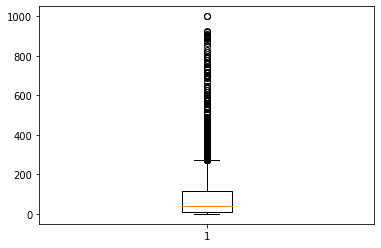

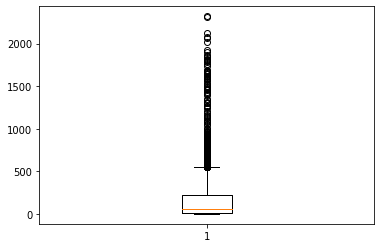

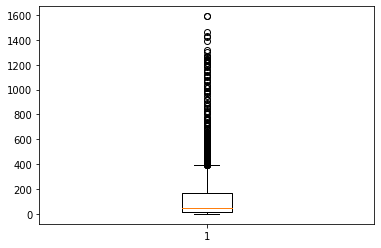

In [56]:
plt.figure()
plt.boxplot(df['e_inc_100k_lo'])

plt.figure()
plt.boxplot(df['e_inc_100k_hi'])

plt.figure()
plt.boxplot(df['e_inc_100k'])

In [57]:
from scipy.stats import iqr
from scipy import stats

In [58]:
print("Mean of e_inc_100k_lo: ", np.mean(df['e_inc_100k_lo']), "\nMedian of e_inc_100k_lo: ", np.median(df['e_inc_100k_lo']))


Mean of e_inc_100k_lo:  87.57370318352052 
Median of e_inc_100k_lo:  38.0


In [59]:
print("Mean of e_inc_100k_hi: ", np.mean(df['e_inc_100k_hi']), "\nMedian of e_inc_100k_hi: ", np.median(df['e_inc_100k_hi']))

Mean of e_inc_100k_hi:  174.2143235018726 
Median of e_inc_100k_hi:  57.0


In [60]:
print("Mean of e_inc_100k: ", np.mean(df['e_inc_100k']), "\nMedian of e_inc_100k: ", np.median(df['e_inc_100k']))

Mean of e_inc_100k:  126.77383895131082 
Median of e_inc_100k:  48.0


In [62]:
print("Standard Daviation of e_inc_100k_lo: ", np.std(df['e_inc_100k_lo']),"\nMedian Absolute deviation", stats.median_absolute_deviation(df['e_inc_100k_lo']))

Standard Daviation of e_inc_100k_lo:  126.91213343129334 
Median Absolute deviation 47.88797999999999


<ipython-input-62-d6cf70260a8b>:1: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  print("Standard Daviation of e_inc_100k_lo: ", np.std(df['e_inc_100k_lo']),"\nMedian Absolute deviation", stats.median_absolute_deviation(df['e_inc_100k_lo']))


In [63]:
print("Standard Daviation of e_inc_100k_hi: ", np.std(df['e_inc_100k_hi']),"\nMedian Absolute deviation", stats.median_absolute_deviation(df['e_inc_100k_hi']))

Standard Daviation of e_inc_100k_hi:  271.7336845977963 
Median Absolute deviation 73.75935


<ipython-input-63-e05216b366fc>:1: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  print("Standard Daviation of e_inc_100k_hi: ", np.std(df['e_inc_100k_hi']),"\nMedian Absolute deviation", stats.median_absolute_deviation(df['e_inc_100k_hi']))


In [64]:
print("Standard Daviation of e_inc_100k: ", np.std(df['e_inc_100k']), "\nMedian Absolute deviation", stats.median_absolute_deviation(df['e_inc_100k']))

Standard Daviation of e_inc_100k:  190.94480634355756 
Median Absolute deviation 61.527899999999995


<ipython-input-64-fdd97a0665e3>:1: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  print("Standard Daviation of e_inc_100k: ", np.std(df['e_inc_100k']), "\nMedian Absolute deviation", stats.median_absolute_deviation(df['e_inc_100k']))


In [65]:
print("Standard Daviation of e_inc_100k_lo: ", np.std(df['e_inc_100k_lo']),"\nInter Quartile Range: ", iqr(df['e_inc_100k_lo']))

Standard Daviation of e_inc_100k_lo:  126.91213343129334 
Inter Quartile Range:  104.0


In [66]:
print("Standard Daviation of e_inc_100k_hi: ", np.std(df['e_inc_100k_hi']),"\nInter Quartile Range: ", iqr(df['e_inc_100k_hi']))

Standard Daviation of e_inc_100k_hi:  271.7336845977963 
Inter Quartile Range:  212.0


In [67]:
print("Standard Daviation of e_inc_100k: ", np.std(df['e_inc_100k']),"\nInter Quartile Range: ", iqr(df['e_inc_100k']))

Standard Daviation of e_inc_100k:  190.94480634355756 
Inter Quartile Range:  151.5
